# Práctica 1. Técnicas de Optimización.

### José Antonio Tirado Carballo
### Pablo Benítez Fernández

Librerías necesarias:

In [1]:
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## Ejercicio 1.

Dados los siguientes datos

$$
\begin{array}{|c|c|c|c|c|}
\hline
x & 2 & 4 & 6 & 8 \\
\hline
y & 3 & 2 & 5 & 6 \\
\hline
\end{array}
$$

Determinar la recta de regresión 
$$
y = \beta_0 + \beta_1 x
$$

Mediante Python, usando las fórmulas vistas y creando una función propia para el modelo de regresión lineal.

Primero, haciendo uso de la función LinearRegression() del paquete sklearn, podemos obtener directamente los coeficientes estimados $\hat{\beta_0}$ y $\hat{\beta_1}$ para la recta de regresión pedida según los datos dados.

In [2]:
x = np.array([[2,4,6,8]])
y = np.array([[3,2,5,6]])

In [3]:
model  = LinearRegression()
model.fit(x.T, y.T)
model.coef_, model.intercept_

(array([[0.6]]), array([1.]))

Es decir, tenemos que $\hat{\beta_0} = 1$ y $\hat{\beta_1}=0.6$, por lo que la recta de regresión vendría dada por la expresión
$$
y = 1 + 0.6x
$$

A continuación se define una función que generaliza el método de regresión lineal mediante mínimos cuadrados para cualquier número de covariables $p$, i.e,
$$
y = \beta_0 + \beta_1 x_1 + \ldots + \beta_p x_p
$$

La función nos daría los $p+1$ parámetros estimados.

In [4]:
def regresion_lineal(x, y):
    Y = y.T # Vector de observaciones 
    Unos = np.ones(len(x[0])) # Vector de unos para el término independiente
    X_dis = np.vstack((Unos, x)).T
    X_dis_tras = X_dis.T # Traspuesta de la matriz del diseño X
    XtX = np.dot(X_dis_tras, X_dis) # X'X
    Determinante = np.linalg.det(np.dot(X_dis_tras, X_dis))
    if Determinante == 0:
        return 'Determinante tiene que ser no nulo'
    else:
        beta = np.linalg.inv(np.dot(X_dis_tras, X_dis)).dot(X_dis_tras).dot(Y) # Parámetros estimados
        return beta    
    # La salida devuelve un array con los parámetros estimados en el siguiente orden:
    # beta_0, beta_1, ..., beta_p

Con los datos dados, obtenemos como era de esperar la misma salida que con la funcion LinearRegression()

In [5]:
x = np.array([[2,4,6,8]])
y = np.array([[3,2,5,6]])
regresion_lineal(x, y)

array([[1. ],
       [0.6]])

A continuación se expone un ejemplo para el caso $p = 3$ (dos covariables $x_1$ y $x_2$):

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2,
$$

con los datos siguientes:
$$
\begin{array}{|c|c|c|c|c|}
\hline
x_1 & 1 & 2 & 0 & 4 \\
\hline
x_2 & 2 & 4 & 6 & -1 \\
\hline
y & 5 & 7 & 9 & 11 \\
\hline
\end{array}
$$


In [6]:
x1 = np.array([[1, 2, 0, 4]])
x2 = np.array([[2, 4, 6, -1]]) 
x = np.vstack((x1, x2))
y = np.array([[5, 7, 9, 11]])

In [7]:
model  = LinearRegression()
model.fit(x.T, y.T)
model.coef_, model.intercept_

(array([[1.61538462, 0.53846154]]), array([3.69230769]))

Mediante LinearRegression() obtenemos los parámetros estimados 
$$
\begin{cases}
 \hat{\beta}_0 = 3.6923 \\
 \hat{\beta}_1 =  1.61538\\
 \hat{\beta}_2 = 0.53846
\end{cases}
$$

Y mediante nuestra función, obtenemos el mismo resultado como era de esperar:

In [8]:
regresion_lineal(x,y)

array([[3.69230769],
       [1.61538462],
       [0.53846154]])

## Ejercicio 2.

Dada la función 
$$
f(x) = x^3-8x^2+21x-18
$$
y sabiendo que tiene un mínimo relativo en el intervalo $[2.8,3.4]$, se pide:

a) Si se quiere acotar la solución en un intervalo de magnitud 0.01, ¿cuál es el número de iteraciones necesarias con el algoritmo de la sección áurea? Implementa dicho algoritmo en una función para resolver el problema.

Tenemos que la solución debe estar en un intervalo de magnitud $\epsilon = 0.01$, teniendo en cuenta la expresión que nos da el número mínimo de iteraciones, que es el menor entero $n$ que verifique la desigualdad

$$
n > \frac{ln(I_0)-ln(\epsilon)}{ln(\phi)},
$$

tenemos que, para nuestro caso particular

In [9]:
I0 = 3.4-2.8
eps = 0.01
phi = (1 + 5 ** 0.5) / 2
logphi = math.log(phi)
valorFrac = (math.log(I0)-math.log(eps))/logphi
print(valorFrac)

8.508403885783501


Por tanto el menor entero $n$ que verifica que $n$ > 8.5084 es

In [10]:
n = math.ceil(valorFrac)
print(n)

9


A continuación se define la función para aplicar el algoritmo de la sección aurea dadas la función $f$, los extremos del intervalo $I =[a,b]$ y la magnitud del intervalo final $\epsilon$.

In [11]:
def SeccionAurea(f,a,b,eps):
    phi = (1 + 5 ** 0.5) / 2
    phiInv = 1/phi
    I0 = b-a
    x1 = b-phiInv*I0
    x2 = a+phiInv*I0
    f1 = f(x1)
    f2 = f(x2)

    # Encabezado de la tabla donde se registrarán las iteraciones
    print(f"{'Iter':<5} {'a':<10} {'b':<10} {'x1':<10} {'x2':<10} {'f(x1)':<10} {'f(x2)':<10}")
    print("-"*70)
    iteracion = 0

    while (b-a) > eps:
        print(f"{iteracion:<5} {a:<10.5f} {b:<10.5f} {x1:<10.5f} {x2:<10.5f} {f1:<10.5f} {f2:<10.5f}")

        if f1 < f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = b - phiInv*(b-a)
            f1 = f(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + phiInv*(b-a)
            f2 = f(x2)
            
        iteracion += 1
    return (a+b)/2 

Para nuestro caso particular, tenemos:

In [12]:
def f(x):
    return x**3 - 8*x**2 + 21*x - 18  

a = 2.8
b = 3.4
epsilon = 0.01

minimo = SeccionAurea(f, a, b, epsilon)
print(f"El mínimo estimado mediante el algoritmo de la sección aurea se da en x = {minimo}")

Iter  a          b          x1         x2         f(x1)      f(x2)     
----------------------------------------------------------------------
0     2.80000    3.40000    3.02918    3.17082    0.00088    0.03416   
1     2.80000    3.17082    2.94164    3.02918    0.00321    0.00088   
2     2.94164    3.17082    3.02918    3.08328    0.00088    0.00751   
3     2.94164    3.08328    2.99574    3.02918    0.00002    0.00088   
4     2.94164    3.02918    2.97508    2.99574    0.00061    0.00002   
5     2.97508    3.02918    2.99574    3.00851    0.00002    0.00007   
6     2.97508    3.00851    2.98785    2.99574    0.00015    0.00002   
7     2.98785    3.00851    2.99574    3.00062    0.00002    0.00000   
8     2.99574    3.00851    3.00062    3.00364    0.00000    0.00001   
El mínimo estimado mediante el algoritmo de la sección aurea se da en x = 2.9996894379984855


b) Con la misma amplitud 0.01 del intervalo final, ¿cuál sería el número de iteraciones necesarias con el algoritmo de Fibonacci? Implementa dicho algoritmo en una función para resolver el problema.

A continuación se calcula el número de iteraciones necesarias con el algoritmo de Fibonnaci, teniendo en cuenta que el número mínimo de iteraciones se determina por ser $n$ el menor entero verificando:

$$
\frac{I_0}{F_n} < \epsilon
$$

In [13]:
a = 2.8
b = 3.4
I0 = b - a
eps = 0.01
valorFracFib = I0/eps
print(f"El valor de I0/eps es {valorFracFib}")

def iter(valor):
    x1 = 1
    x2 = 2
    cont = 1 
    while x2 < valor:
        x = x1 + x2
        x1 = x2
        x2 = x
        cont += 1
    return cont

print(f"El número de iteraciones necesarias es n = {iter(valorFracFib)}")

El valor de I0/eps es 60.00000000000001
El número de iteraciones necesarias es n = 9


Por lo que el número de iteraciones es $n = 9$

Y el algoritmo de Fibonacci se implementa usando las siguientes funciones:

In [14]:
def fib(n, dicfib={}):
    if n in dicfib:
        return dicfib[n]
    if n == 0:
        return 1
    if n == 1:
        return 2
    dicfib[n] = fib(n - 1, dicfib) + fib(n - 2, dicfib)
    return dicfib[n]

def Fibonacci(f, a, b, eps):
    iter = 1  # Empezar con la primera iteración
    while (b - a) > eps:
        d = (fib(iter - 1) / fib(iter)) * (b - a) + (((-1)**iter) / fib(iter)) * eps
        x1 = b - d
        x2 = a + d

        fx1 = f(x1)
        fx2 = f(x2)

        print(f"{iter:^10} | {a:^10.6f} | {b:^10.6f} | {x1:^10.6f} | {x2:^10.6f} | {fx1:^10.6f} | {fx2:^10.6f}")
        
        if fx1 < fx2:
            b = x2
        else:
            a = x1

        iter += 1  # Incrementar el número de iteraciones

    return (a + b) / 2

Y para nuestro caso particular, tenemos:

In [15]:
def f(x):
    return x**3 - 8*x**2 + 21*x - 18  

a = 2.8
b = 3.4
epsilon = 0.01

minimo = Fibonacci(f, a, b, eps=epsilon)
print(f"El mínimo estimado por el método de Fibonaci se da en x = {minimo}")

    1      |  2.800000  |  3.400000  |  3.105000  |  3.095000  |  0.012183  |  0.009882 
    2      |  3.105000  |  3.400000  |  3.200000  |  3.305000  |  0.048000  |  0.121398 
    3      |  3.105000  |  3.305000  |  3.187000  |  3.223000  |  0.041508  |  0.060819 
    4      |  3.105000  |  3.223000  |  3.148000  |  3.180000  |  0.025146  |  0.038232 
    5      |  3.105000  |  3.180000  |  3.134615  |  3.150385  |  0.020561  |  0.026017 
    6      |  3.105000  |  3.150385  |  3.121813  |  3.133571  |  0.016646  |  0.020224 
    7      |  3.105000  |  3.133571  |  3.116218  |  3.122353  |  0.015076  |  0.016802 
    8      |  3.105000  |  3.122353  |  3.111444  |  3.115909  |  0.013804  |  0.014992 
    9      |  3.105000  |  3.115909  |  3.109280  |  3.111629  |  0.013247  |  0.013852 
El mínimo estimado por el método de Fibonaci se da en x = 3.108314606741573


c) Repetir lo anterior con el algoritmo de bisección.

Para calcular el número mínimo de iteraciones necesarias mediante el método de la bisección, teniendo en cuenta que el número mínimo de iteraciones es el menor entero $n$ verificando la desigualdad 

$$
\frac{I_0}{2^n} \leq \epsilon
$$,

despejando $n$ obtenemos que 

$$
n \geq log_2(\frac{I_0}{\epsilon})
$$,

por tanto $n$ vendrá dado por

In [16]:
I0 = 3.4-2.8
eps = 0.01
n = math.ceil(math.log2(I0/eps))
print(f"El número de iterciones necesarias en el algoritmo de la bisección es {n}")

El número de iterciones necesarias en el algoritmo de la bisección es 6


A continuación se implementa el algoritmo de la bisección:

In [17]:
def Biseccion(df, a, b, eps):
    x0 = a
    x1 = b
    iteracion = 0

    print(f"{'Iteración':>10} {'x0':>15} {'x1':>15} {'xm':>15} {'f(xm)':>15}")
    print("-"*75)

    while (x1 - x0) > eps:
        xm = (x0 + x1) / 2
        dfxm = df(xm)

        print(f"{iteracion:10} {x0:15.10f} {x1:15.10f} {xm:15.10f} {dfxm:15.10f}")

        if dfxm == 0:
            break
        
        elif dfxm > 0:
            x1 = xm
        else: 
            x0 = xm

        iteracion += 1
        
    return (a+b)/2

In [18]:
def df(x):
    return 3*x**2 - 16*x + 21

a = 2.8
b = 3.4
epsilon = 0.01

minimo = Biseccion(df, a, b, eps=epsilon)
print(f"El mínimo estimado por el método de la bisección se da en x = {minimo}")


 Iteración              x0              x1              xm           f(xm)
---------------------------------------------------------------------------
         0    2.8000000000    3.4000000000    3.1000000000    0.2300000000
         1    2.8000000000    3.1000000000    2.9500000000   -0.0925000000
         2    2.9500000000    3.1000000000    3.0250000000    0.0518750000
         3    2.9500000000    3.0250000000    2.9875000000   -0.0245312500
         4    2.9875000000    3.0250000000    3.0062500000    0.0126171875
         5    2.9875000000    3.0062500000    2.9968750000   -0.0062207031
El mínimo estimado por el método de la bisección se da en x = 3.0999999999999996


d) Resolver este problema con minimize_scalar o minimize de scipy.optimize.

Con minimize_scalar:

In [19]:
def f(x):
    return x**3 - 8*x**2 + 21*x - 18 

resultado = minimize_scalar(f, bounds = (2.8,3.4), method = 'bounded')

print(f"El mínimo estimado por minimize_scalar se da en x = {resultado.x}, y el valor mínimo estimado es {resultado.fun}")

El mínimo estimado por minimize_scalar se da en x = 3.0000013272250845, y el valor mínimo estimado es 1.7550405573274475e-12


Con minimize:

In [20]:
def f(x):
    return x**3 - 8*x**2 + 21*x - 18 
a = 2.8
b = 3.4
x0 = (a+b)/2

resultado = minimize(f,x0)

print(f"El mínimo estimado por minimize se da en x = {resultado.x}, y el valor mínimo estimado es {resultado.fun}")

El mínimo estimado por minimize se da en x = [3.], y el valor mínimo estimado es 0.0


e) Resolverlo de forma analítica mediante el módulo sympy ¿Podrías automatizarlo y crear una función en python que devuelva todos los mínimos locales de una función dada?

In [21]:
import sympy as sp

def encontrar_minimos_locales(funcion):
    
    derivada_primera = sp.diff(funcion, x)
    
    # Los puntos críticos se encuentran resolviendo derivada_primera == 0
    puntos_criticos = sp.solve(derivada_primera, x)
    
    minimos_locales = []
    
    # A continuación se aplica el criterio de la segunda derivada
    derivada_segunda = sp.diff(derivada_primera, x)
    
    for punto in puntos_criticos:
        
        valor_segunda_derivada = derivada_segunda.subs(x, punto)
        
        if valor_segunda_derivada > 0:
            minimos_locales.append(punto)
    
    return minimos_locales


Podemos aplicar esta función a nuestra función de interés:

In [22]:
# Defino la variable simbólica antes de usar la función 
x = sp.symbols('x')

# Función simbólica
funcion = x**3 - 8*x**2 + 21*x - 18 

minimos = encontrar_minimos_locales(funcion)

if minimos:
    print(f"Los mínimos locales se encuentran en: {minimos}")
else:
    print("No se encontraron mínimos locales.")

Los mínimos locales se encuentran en: [3]


Vamos a probar ahora con otra función, por ejemplo con la función polinómica $x^5 - 5x^3 + 4x$, que tiene dos mínimos locales:

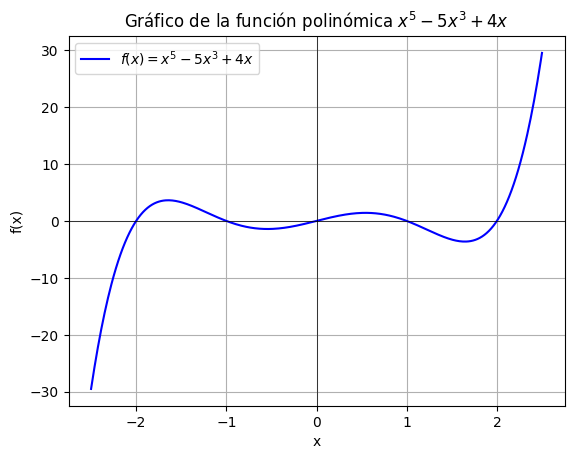

In [23]:
def f(x):
    return x**5 - 5*x**3 + 4*x

x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label=r'$f(x) = x^5 - 5x^3 + 4x$', color='blue')

plt.title("Gráfico de la función polinómica $x^5 - 5x^3 + 4x$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()

plt.show()

In [24]:
# Defino la variable simbólica antes de usar la función 
x = sp.symbols('x')

# Función simbólica
funcion = x**5 - 5*x**3 + 4*x

minimos = encontrar_minimos_locales(funcion)

if minimos:
    print(f"Los mínimos locales se encuentran en: {minimos}")
else:
    print("No se encontraron mínimos locales.")

Los mínimos locales se encuentran en: [-sqrt(3/2 - sqrt(145)/10), sqrt(sqrt(145)/10 + 3/2)]


## Ejercicio 3.

Dada la función 

$$
f(x,y) = x^2+3y^2+(x-2)(y-3)
$$

Se pide, partiendo del origen de coordendas $(0,0)$ lo siguiente:

a) Determinar la dirección de máximo descenso.

La dirección de máximo descenso de la función f en (x,y) vendrá dada por el opuesto del gradiente de la función (normalizado), es decir, la dirección de máximo descenso es 
$$
d(x,y) = - \frac{\nabla f(x,y)}{|| \nabla f(x,y) ||}
$$.

Calculando las derivadas obtenemos que

$$
\begin{cases}
    f_x = 2x+y-3, \\
    f_y = 6y+x-2
\end{cases}
$$, 

Por tanto el gradiente de f viene dado por

$$
-\nabla f(x,y) = (-2x-y+3,-6y-x+2)
$$

Para calcular la magnitud de este vector, usamos la fórmula de la norma euclidiana:

$$
||(-2x - y + 3, -6y - x + 2)|| = \sqrt{(-2x - y + 3)^2 + (-6y - x + 2)^2}
$$

Desarrollamos cada término:

1. El primer término es:

$$
(-2x - y + 3)^2 = (4x^2 + 4xy - 12x + y^2 - 6y + 9)
$$

2. El segundo término es:

$$
(-6y - x + 2)^2 = (36y^2 + 12xy - 24y + x^2 - 4x + 4)
$$

Sumamos ambos términos:

$$
||(-2x - y + 3, -6y - x + 2)||^2 = (4x^2 + 4xy - 12x + y^2 - 6y + 9) + (36y^2 + 12xy - 24y + x^2 - 4x + 4)
$$

Agrupamos términos semejantes:

$$
||(-2x - y + 3, -6y - x + 2)||^2 = 5x^2 + 16xy - 16x + 37y^2 - 30y + 13
$$

Por lo tanto, la norma del gradiente es:

$$
||(-2x - y + 3, -6y - x + 2)|| = \sqrt{5x^2 + 16xy - 16x + 37y^2 - 30y + 13}
$$

Finalmente, la dirección de máximo descenso $d(x, y)$ está dada por:

$$
d(x, y) = -\frac{(-2x - y + 3, -6y - x + 2)}{\sqrt{5x^2 + 16xy - 16x + 37y^2 + 18y + 13}}
$$

b) Desarrollar un par de iteraciones con el algoritmo de Steepest descent.

A continuación se define una función que implementa el algoritmo de Steepest descent, para un número que queramos de iteraciones (prefijado) ya que se piden un par.

In [25]:
def f(x):
    return x[0]**2 + 3*x[1]**2 + (x[0] - 2)*(x[1] - 3)

# Función g(lambda) para encontrar el lambda óptimo
def funcionLineal(Lambda, x, grad_x, grad_y, f):
    return f([x[0] - Lambda * grad_x, x[1] - Lambda * grad_y])

def SteepestDescent(x, f, dfx, dfy, iteraciones):

    k = 0

    print(f"{'Iter':<5} {'x':<12} {'y':<12} {'f(x,y)':<15} {'dfx':<10} {'dfy':<10} {'Lambda':<10}")
    print("-" * 80)
    
    while k < iteraciones:

        grad_x = dfx(x)
        grad_y = dfy(x)
    
        valor_f = f(x)
        
        # Minimización de g(lambda)
        res = minimize(funcionLineal, 0, args=(x, grad_x, grad_y, f))
        Lambda_optimo = res.x[0]
        
        print(f"{k+1:<5} {x[0]:<12.6f} {x[1]:<12.6f} {valor_f:<15.6f} {grad_x:<10.6f} {grad_y:<10.6f} {Lambda_optimo:<10.6f}")
        
        # Actualización de las las coordenadas usando el gradiente y el paso óptimo Lambda
        x[0] = x[0] - Lambda_optimo * grad_x
        x[1] = x[1] - Lambda_optimo * grad_y
        
        k += 1

    valor_final = f(x)

    return x, valor_final

A continuación se aplica para nuestro problema particular, con dos iteraciones

In [26]:
# Función objetivo
def f(x):
    return x[0]**2 + 3*x[1]**2 + (x[0] - 2)*(x[1] - 3)

# Derivadas parciales
def dfx(x):
    return 2*x[0] + x[1] - 3

def dfy(x):
    return 6*x[1] + x[0] - 2


x_inicial = [0, 0]
iteraciones = 2


resultado = SteepestDescent(x_inicial, f, dfx, dfy, iteraciones)

print(f"Punto donde se alcanza el mínimo estimado: ({resultado[0][0]:.6f}, {resultado[0][1]:.6f})")
print(f"Valor mínimo de la función estimado por Steepest descent con {iteraciones} iteraciones: {resultado[1]:.6f}")

Iter  x            y            f(x,y)          dfx        dfy        Lambda    
--------------------------------------------------------------------------------
1     0.000000     0.000000     6.000000        -3.000000  -2.000000  0.240741  
2     0.722222     0.481481     4.435185        -1.074074  1.611111   0.260000  
Punto donde se alcanza el mínimo estimado: (1.001481, 0.062593)
Valor mínimo de la función estimado por Steepest descent con 2 iteraciones: 3.947774


Si quisiesemos aplicar, por ejemplo, 10 iteraciones:

In [35]:
x_inicial = [0,0]
iteraciones = 10
resultado = SteepestDescent(x_inicial, f, dfx, dfy, iteraciones)

print(f"Punto donde se alcanza el mínimo estimado: ({resultado[0][0]:.6f}, {resultado[0][1]:.6f})")
print(f"Valor mínimo de la función estimado por Steepest descent con {iteraciones} iteraciones: {resultado[1]:.6f}")

Iter  x            y            f(x,y)          dfx        dfy        Lambda    
--------------------------------------------------------------------------------
1     0.000000     0.000000     6.000000        -3.000000  -2.000000  0.240741  
2     0.722222     0.481481     4.435185        -1.074074  1.611111   0.260000  
3     1.001481     0.062593     3.947774        -0.934444  -0.622963  0.240741  
4     1.226440     0.212565     3.795955        -0.334554  0.501831   0.260000  
5     1.313424     0.082089     3.748666        -0.291062  -0.194041  0.240741  
6     1.383495     0.128803     3.733936        -0.104208  0.156311   0.260001  
7     1.410589     0.088162     3.729348        -0.090660  -0.060441  0.240739  
8     1.432414     0.102712     3.727919        -0.032459  0.048688   0.260004  
9     1.440854     0.090053     3.727474        -0.028239  -0.018827  0.240732  
10    1.447652     0.094585     3.727335        -0.010111  0.015165   0.259995  
Punto donde se alcanza el mí

Si en lugar de esto, queremos programarlo con el criterio de parada $||\nabla f(x^k)|| < \epsilon $, en lugar de con un número predefinido de iteraciones:

In [28]:
# Función g(lambda) para encontrar el lambda óptimo
def funcionLineal(Lambda, x, grad_x, grad_y, f):
    return f([x[0] - Lambda * grad_x, x[1] - Lambda * grad_y])

def SteepestDescent_eps(x, f, dfx, dfy, eps):
    k = 0
    
    grad_x = dfx(x)
    grad_y = dfy(x)
    norma_grad_f = np.sqrt(grad_x**2 + grad_y**2)
    print(f"{'Iter':<5} {'x':<12} {'y':<12} {'f(x,y)':<15} {'dfx':<10} {'dfy':<10} {'||Grad_f||':<10} {'Lambda':<10}")
    print("-" * 90)

    # Criterio de parada: ||grad(f(x))|| < eps
    while norma_grad_f >= eps:

        grad_x = dfx(x)
        grad_y = dfy(x)    
        
        valor_f = f(x)
        norma_grad_f = np.sqrt(grad_x**2 + grad_y**2)

        res = minimize(funcionLineal, 0, args=(x, grad_x, grad_y, f))
        Lambda_optimo = res.x[0]

        print(f"{k+1:<5} {x[0]:<12.6f} {x[1]:<12.6f} {valor_f:<15.6f} {grad_x:<10.6f} {grad_y:<10.6f} {norma_grad_f:<10.6f} {Lambda_optimo:<10.6f}")
        
        x[0] = x[0] - Lambda_optimo * grad_x
        x[1] = x[1] - Lambda_optimo * grad_y
        
        k += 1

    valor_final = f(x)
    return x, valor_final

In [29]:
# Función objetivo
def f(x):
    return x[0]**2 + 3*x[1]**2 + (x[0] - 2)*(x[1] - 3)

# Derivadas parciales
def dfx(x):
    return 2*x[0] + x[1] - 3

def dfy(x):
    return 6*x[1] + x[0] - 2

x_inicial = [0, 0]
epsilon = 0.01


resultado = SteepestDescent_eps(x_inicial, f, dfx, dfy, epsilon)

print(f"Punto donde se alcanza el mínimo estimado: ({resultado[0][0]:.6f}, {resultado[0][1]:.6f})")
print(f"Valor mínimo de la función estimado por Steepest descent: {resultado[1]:.6f}")

Iter  x            y            f(x,y)          dfx        dfy        ||Grad_f|| Lambda    
------------------------------------------------------------------------------------------
1     0.000000     0.000000     6.000000        -3.000000  -2.000000  3.605551   0.240741  
2     0.722222     0.481481     4.435185        -1.074074  1.611111   1.936315   0.260000  
3     1.001481     0.062593     3.947774        -0.934444  -0.622963  1.123062   0.240741  
4     1.226440     0.212565     3.795955        -0.334554  0.501831   0.603126   0.260000  
5     1.313424     0.082089     3.748666        -0.291062  -0.194041  0.349813   0.240741  
6     1.383495     0.128803     3.733936        -0.104208  0.156311   0.187863   0.260001  
7     1.410589     0.088162     3.729348        -0.090660  -0.060441  0.108961   0.240739  
8     1.432414     0.102712     3.727919        -0.032459  0.048688   0.058515   0.260004  
9     1.440854     0.090053     3.727474        -0.028239  -0.018827  0.033939   

c) Desarrollar un par de iteraciones con el algoritmo de Newton.

Se implementa el algoritmo de Newton con un número prefijado de iteraciones a hacer ya que se piden un par.

In [30]:
def Newton(x, f, dfx, dfy, h11,h12,h21,h22, iteraciones):

    print(f"{'Iteración':<10} {'x1':<10} {'x2':<10} {'f(x)':<15} {'Grad_x':<10} {'Grad_y':<10} {'H11':<10} {'H12':<10} {'H21':<10} {'H22':<10}")
    print("-" * 110)

    k=0

    while k < iteraciones:
        Hessian = np.array([[h11(x), h12(x)], [h21(x), h22(x)]])
        grad_x = dfx(x)
        grad_y = dfy(x)
        grad_f = np.array([[grad_x], [grad_y]])
        valor_f = f(x)          
        print(f"{k+1:<10} {x[0]:<10.6f} {x[1]:<10.6f} {valor_f:<15.6f} {grad_x:<10.6f} {grad_y:<10.6f} {Hessian[0,0]:<10.6f} {Hessian[0,1]:<10.6f} {Hessian[1,0]:<10.6f} {Hessian[1,1]:<10.6f}")

        x = x - np.dot(np.linalg.inv(Hessian),grad_f).flatten()
 
        k+=1

    valor_final = f(x)


    return x, valor_final

Para nuestro caso particular, con dos iteraciones:

In [31]:
# Función objetivo
def f(x):
    return x[0]**2 + 3*x[1]**2 + (x[0] - 2)*(x[1] - 3)

# Derivadas parciales
def dfx(x):
    return 2*x[0] + x[1] - 3

def dfy(x):
    return 6*x[1] + x[0] - 2

# Hessiana
def h11(x):
    return 2

def h12(x):
    return 1

def h21(x):
    return 1

def h22(x):
    return 6

x_inicial = [0,0]
iteraciones = 2


resultado = Newton(x_inicial, f, dfx, dfy, h11, h12, h21, h22, iteraciones)

print(f"Punto donde se alcanza el mínimo estimado: ({resultado[0][0]:.6f}, {resultado[0][1]:.6f})")
print(f"Valor mínimo de la función estimado por el método de Newton con {iteraciones} iteraciones: {resultado[1]:.6f}")

Iteración  x1         x2         f(x)            Grad_x     Grad_y     H11        H12        H21        H22       
--------------------------------------------------------------------------------------------------------------
1          0.000000   0.000000   6.000000        -3.000000  -2.000000  2.000000   1.000000   1.000000   6.000000  
2          1.454545   0.090909   3.727273        -0.000000  -0.000000  2.000000   1.000000   1.000000   6.000000  
Punto donde se alcanza el mínimo estimado: (1.454545, 0.090909)
Valor mínimo de la función estimado por el método de Newton con 2 iteraciones: 3.727273


Nota: en nuestro caso particular, tenemos que la Hessiana es constante, luego podríamos sacarla fuera del bucle y ahorrar cálculos. No obstante, la implementación del algoritmo está realizada de modo que se pueda tener Hessianas no constantes.

Si queremos usar el criterio de parada $||\nabla f(x^k)|| < \epsilon$:

In [32]:
def Newton_eps(x, f, dfx, dfy, h11, h12, h21, h22, eps):

    print(f"{'Iteración':<10} {'x1':<10} {'x2':<10} {'f(x)':<15} {'Grad_x':<10} {'Grad_y':<10} {'||Grad_f||      ':<10} {'H11':<10} {'H12':<10} {'H21':<10} {'H22':<10}")
    print("-" * 140)

    k = 0

    grad_x = dfx(x)
    grad_y = dfy(x)
    norma_grad_f = np.sqrt(grad_x**2 + grad_y**2)

    # Criterio de parada: ||grad(f(x))|| < eps
    while norma_grad_f >= eps:
        Hessian = np.array([[h11(x), h12(x)], [h21(x), h22(x)]])
        grad_f = np.array([[grad_x], [grad_y]])
        valor_f = f(x) 
        norma_grad_f = np.sqrt(grad_x**2 + grad_y**2)  # Cálculo de ||grad(f(x))||
        
        # Mostrar la información en la tabla
        print(f"{k+1:<10} {x[0]:<10.6f} {x[1]:<10.6f} {valor_f:<15.6f} {grad_x:<10.6f} {grad_y:<10.6f} {norma_grad_f:<15.6f} {Hessian[0,0]:<10.6f} {Hessian[0,1]:<10.6f} {Hessian[1,0]:<10.6f} {Hessian[1,1]:<10.6f}")
     

        x = x - np.dot(np.linalg.inv(Hessian), grad_f).flatten()
        
        grad_x = dfx(x)
        grad_y = dfy(x)

        k += 1

    valor_final = f(x)
    return x, valor_final

In [33]:
# Función objetivo
def f(x):
    return x[0]**2 + 3*x[1]**2 + (x[0] - 2)*(x[1] - 3)

# Derivadas parciales
def dfx(x):
    return 2*x[0] + x[1] - 3

def dfy(x):
    return 6*x[1] + x[0] - 2

# Hessiana
def h11(x):
    return 2

def h12(x):
    return 1

def h21(x):
    return 1

def h22(x):
    return 6

x_inicial = [0,0]
epsilon = 0.01


resultado = Newton_eps(x_inicial, f, dfx, dfy, h11, h12, h21, h22, epsilon)

print(f"Punto donde se alcanza el mínimo estimado: ({resultado[0][0]:.6f}, {resultado[0][1]:.6f})")
print(f"Valor mínimo de la función estimado por el método de Newton: {resultado[1]:.6f}")

Iteración  x1         x2         f(x)            Grad_x     Grad_y     ||Grad_f||       H11        H12        H21        H22       
--------------------------------------------------------------------------------------------------------------------------------------------
1          0.000000   0.000000   6.000000        -3.000000  -2.000000  3.605551        2.000000   1.000000   1.000000   6.000000  
2          1.454545   0.090909   3.727273        -0.000000  -0.000000  0.000000        2.000000   1.000000   1.000000   6.000000  
Punto donde se alcanza el mínimo estimado: (1.454545, 0.090909)
Valor mínimo de la función estimado por el método de Newton: 3.727273


d) Resolver con el paquete scipy.optimize el problema de minimización sin restricciones, se puede utilizar la función minimize.

In [34]:
def f(x):
    return x[0]**2 + 3*x[1]**2 + (x[0] - 2)*(x[1] - 3)

# Punto inicial
x0 = np.array([0, 0])

# Minimize
resultado = minimize(f, x0)

print("Punto donde se alcanza el mínimo estimado:", resultado.x)
print("Valor mínimo estimado de la función:", resultado.fun)

Punto donde se alcanza el mínimo estimado: [1.45454544 0.09090908]
Valor mínimo estimado de la función: 3.727272727272728
